# Clusteting of Reports

In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

Using the following example:
    - https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/

# Load Data

In [4]:
df_ori = pd.read_csv('CRS2018data.txt', sep='|', encoding='ISO-8859-1')

/Users/pedrobaiz/src/hsbc_flow/venv_hsbc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,51,53,56,57,77,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df = df_ori.head(10000)

In [22]:
df.columns

Index(['Year', 'DonorCode', 'DonorName', 'AgencyCode', 'AgencyName', 'CrsID',
       'ProjectNumber', 'InitialReport', 'RecipientCode', 'RecipientName',
       'RegionCode', 'RegionName', 'IncomegroupCode', 'IncomegroupName',
       'FlowCode', 'FlowName', 'Bi_Multi', 'Category', 'Finance_t', 'Aid_t',
       'USD_Commitment', 'USD_Disbursement', 'USD_Received',
       'USD_Commitment_Defl', 'USD_Disbursement_Defl', 'USD_Received_Defl',
       'USD_Adjustment', 'USD_Adjustment_Defl', 'USD_AmountUntied',
       'USD_AmountPartialTied', 'USD_AmountTied', 'USD_AmountUntied_Defl',
       'USD_AmountPartialTied_Defl', 'USD_Amounttied_Defl', 'USD_IRTC',
       'USD_Expert_Commitment', 'USD_Expert_Extended', 'USD_Export_Credit',
       'CurrencyCode', 'Commitment_National', 'Disbursement_National',
       'GrantEquiv', 'USD_GrantEquiv', 'ShortDescription', 'ProjectTitle',
       'PurposeCode', 'PurposeName', 'SectorCode', 'SectorName', 'ChannelCode',
       'ChannelName', 'ChannelReportedName'

In [23]:
df['LongDescription']

0                                         Semi-aggregates
1                                         Semi-aggregates
2                                         Semi-aggregates
3                                         Semi-aggregates
4                                         Semi-aggregates
                              ...                        
9995    SDC's Global budget - Humanitarian assistance ...
9996    La Fédération Genevoise de Coopération (FGC) e...
9997    Unité est le Centre de compétence et l'associa...
9998    Les crédits globaux pour petites actions perme...
9999    The erratic rainfall pattern in Nicaragua duri...
Name: LongDescription, Length: 10000, dtype: object

In [24]:
df['LongDescriptionNew'] = df.LongDescription.fillna("Empty") 
df['ShortDescriptionNew'] = df.ShortDescription.fillna("Empty") 

/Users/pedrobaiz/src/hsbc_flow/venv_hsbc/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/pedrobaiz/src/hsbc_flow/venv_hsbc/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#vec = TfidfVectorizer(stop_words="english")
#vec.fit(df.ShortDescriptionNew.values)
#features = vec.transform(df.ShortDescriptionNew.values)

vec = TfidfVectorizer(stop_words="english")
vec.fit(df.LongDescriptionNew.values)
features = vec.transform(df.LongDescriptionNew.values)

In [26]:
# for reproducibility
random_state = 0 

In [27]:
cls = MiniBatchKMeans(n_clusters=17, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=17, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [28]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([ 8,  8,  8, ..., 10, 10, 10], dtype=int32)

In [29]:
features

<10000x22383 sparse matrix of type '<class 'numpy.float64'>'
	with 233963 stored elements in Compressed Sparse Row format>

### Results for Large Description

<287365x126553 sparse matrix of type '<class 'numpy.float64'>'
	with 5135951 stored elements in Compressed Sparse Row format>

# MDS

In [33]:
# reduce the features to 2D
mds = MDS(n_components=2, random_state=random_state)
mds_reduced_features = mds.fit_transform(features.toarray())

In [35]:
# reduce the cluster centers to 2D
#mds_reduced_cluster_centers = mds.transform(cls.cluster_centers_)

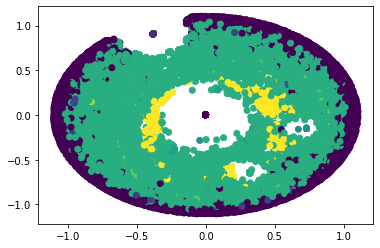

In [36]:
plt.scatter(mds_reduced_features[:,0], mds_reduced_features[:,1], c=cls.predict(features))
#plt.scatter(mds_reduced_cluster_centers[:, 0], mds_reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# PCA

In [30]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state, svd_solver='randomized', whiten=True)
reduced_features = pca.fit_transform(features.toarray())

In [31]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

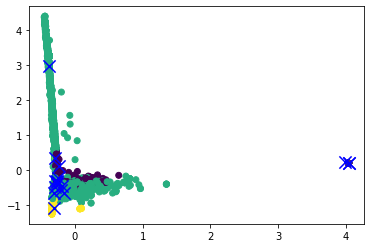

In [32]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')